<a href="https://colab.research.google.com/github/tallerzalan/News-and-Market-Sentiment-Analysis/blob/main/Text%20Preprocessing/Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab Session. Text Preprocessing

---

**Outline:**

*   Applying basic text pre-processing tools
*   Caclucate the measure of cosine similarity between documents 
*   Visualize most frequent words using WordCloud
*   Construct document-feature matrix
*   Perform sentiment analysis based on the presense of particular words using linear regression
*   Practice

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import os
from pathlib import Path
from tqdm import tqdm
tqdm.pandas()

# Libraries for plotting results
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from wordcloud import WordCloud

**Set working directory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/NLP')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content
Current working directory: /content/drive/MyDrive/Colab Notebooks/NLP


**Converting text to a list of tokens**

In [ ]:
nltk.download('all-corpora')
from nltk.book import *

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    | 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
text = "My fellow citizens: I stand here today humbled by the task before us, grateful for the trust you've bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation -- -- as well as the generosity and cooperation he has shown throughout this transition. Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace.  Yet, every so often, the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because we, the people, have remained faithful to the ideals of our forebears and true to our founding documents. So it has been; so it must be with this generation of Americans. That we are in the midst of crisis is now well understood. Our nation is at war against a far-reaching network of violence and hatred. Our economy is badly weakened, a consequence of greed and irresponsibility on the part of some, but also our collective failure to make hard choices and prepare the nation for a new age.  Homes have been lost, jobs shed, businesses shuttered.  Our health care is too costly, our schools fail too many -- and each day brings further evidence that the ways we use energy strengthen our adversaries and threaten our planet. These are the indicators of crisis, subject to data and statistics.  Less measurable, but no less profound, is a sapping of confidence across our land; a nagging fear that America's decline is inevitable, that the next generation must lower its sights. Today I say to you that the challenges we face are real.  They are serious and they are many.  They will not be met easily or in a short span of time.  But know this America:  They will be met.  On this day, we gather because we have chosen hope over fear, unity of purpose over conflict and discord. On this day, we come to proclaim an end to the petty grievances and false promises, the recriminations and worn-out dogmas that for far too long have strangled our politics. We remain a young nation.  But in the words of Scripture, the time has come to set aside childish things. The time has come to reaffirm our enduring spirit; to choose our better history; to carry forward that precious gift, that noble idea passed on from generation to generation: the God-given promise that all are equal, all are free, and all deserve a chance to pursue their full measure of happiness."

In [ ]:
print(text)

My fellow citizens: I stand here today humbled by the task before us, grateful for the trust you've bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation -- -- as well as the generosity and cooperation he has shown throughout this transition. Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace.  Yet, every so often, the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because we, the people, have remained faithful to the ideals of our forebears and true to our founding documents. So it has been; so it must be with this generation of Americans. That we are in the midst of crisis is now well understood. Our nation is at war against a far-reaching network of violence and hatred. Our economy is badly weakened, a conse

In [ ]:
tokens = text.split() # text conversion to a list of tokens (words)
print(tokens)

['My', 'fellow', 'citizens:', 'I', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us,', 'grateful', 'for', 'the', 'trust', "you've", 'bestowed,', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors.', 'I', 'thank', 'President', 'Bush', 'for', 'his', 'service', 'to', 'our', 'nation', '--', '--', 'as', 'well', 'as', 'the', 'generosity', 'and', 'cooperation', 'he', 'has', 'shown', 'throughout', 'this', 'transition.', 'Forty-four', 'Americans', 'have', 'now', 'taken', 'the', 'presidential', 'oath.', 'The', 'words', 'have', 'been', 'spoken', 'during', 'rising', 'tides', 'of', 'prosperity', 'and', 'the', 'still', 'waters', 'of', 'peace.', 'Yet,', 'every', 'so', 'often,', 'the', 'oath', 'is', 'taken', 'amidst', 'gathering', 'clouds', 'and', 'raging', 'storms.', 'At', 'these', 'moments,', 'America', 'has', 'carried', 'on', 'not', 'simply', 'because', 'of', 'the', 'skill', 'or', 'vision', 'of', 'those', 'in', 'high', 'office,', 'but', 'because', 'we,', '

**Contraction to Expansion**

In [ ]:
# create a dictionary of contractions
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"you've": "you have"}

In [ ]:
#define a function that corrects the text 
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  else:
    return x

In [ ]:
text = cont_to_exp(text)

In [ ]:
print(text)

My fellow citizens: I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation -- -- as well as the generosity and cooperation he has shown throughout this transition. Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace.  Yet, every so often, the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because we, the people, have remained faithful to the ideals of our forebears and true to our founding documents. So it has been; so it must be with this generation of Americans. That we are in the midst of crisis is now well understood. Our nation is at war against a far-reaching network of violence and hatred. Our economy is badly weakened, a con

**Convert to lower case**

In [ ]:
text = text.lower()

Remove particular words

In [ ]:
text = text.replace('(applause)', "")

**Remove punctuation**

In [ ]:
remove_punct = str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”’—')

In [ ]:
text = text.translate(remove_punct)

In [ ]:
print(text)

my fellow citizens i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank president bush for his service to our nation   as well as the generosity and cooperation he has shown throughout this transition fortyfour americans have now taken the presidential oath the words have been spoken during rising tides of prosperity and the still waters of peace  yet every so often the oath is taken amidst gathering clouds and raging storms at these moments america has carried on not simply because of the skill or vision of those in high office but because we the people have remained faithful to the ideals of our forebears and true to our founding documents so it has been so it must be with this generation of americans that we are in the midst of crisis is now well understood our nation is at war against a farreaching network of violence and hatred our economy is badly weakened a consequence of greed and irre

Tokenization

In [ ]:
tokens = text.split()
print(tokens)

['my', 'fellow', 'citizens', 'i', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', 'i', 'thank', 'president', 'bush', 'for', 'his', 'service', 'to', 'our', 'nation', 'as', 'well', 'as', 'the', 'generosity', 'and', 'cooperation', 'he', 'has', 'shown', 'throughout', 'this', 'transition', 'fortyfour', 'americans', 'have', 'now', 'taken', 'the', 'presidential', 'oath', 'the', 'words', 'have', 'been', 'spoken', 'during', 'rising', 'tides', 'of', 'prosperity', 'and', 'the', 'still', 'waters', 'of', 'peace', 'yet', 'every', 'so', 'often', 'the', 'oath', 'is', 'taken', 'amidst', 'gathering', 'clouds', 'and', 'raging', 'storms', 'at', 'these', 'moments', 'america', 'has', 'carried', 'on', 'not', 'simply', 'because', 'of', 'the', 'skill', 'or', 'vision', 'of', 'those', 'in', 'high', 'office', 'but', 'because', 'we', 'the', 'people', 'have

**Stopwords**

---
*   nltk
*   gensim

Removing stopwords allows to reduce dimensionality and focus on text features that contain relevant information


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk_stopwords = stopwords.words('english')

print(f'NLTK stopwords: {len(nltk_stopwords)}')

print(nltk_stopwords[:10])

NLTK stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
import gensim
import gensim.corpora as corpora

In [ ]:
gensim_sws = gensim.parsing.preprocessing.STOPWORDS

gensim_stopwords = list(gensim_sws)

print(f'GENSIM stopwords: {len(gensim_stopwords)}')

print(gensim_stopwords[:10])

GENSIM stopwords: 337
['empty', 'mill', 'not', 'un', 'detail', 'it', 'perhaps', 'until', 'more', 'fify']


**Visualize stopwords using termcolor**

In [ ]:
import sys
from termcolor import colored, cprint

In [ ]:
split_text = [i for j in text.split() for i in (j, ' ')]

col_text = [
    colored(x, 'blue') if x in nltk_stopwords
    else x 
    for x in split_text
    ]

print(''.join(col_text))

my fellow citizens i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank president bush for his service to our nation as well as the generosity and cooperation he has shown throughout this transition fortyfour americans have now taken the presidential oath the words have been spoken during rising tides of prosperity and the still waters of peace yet every so often the oath is taken amidst gathering clouds and raging storms at these moments america has carried on not simply because of the skill or vision of those in high office but because we the people have remained faithful to the ideals of our forebears and true to our founding documents so it has been so it must be with this generation of americans that we are in the midst of crisis is now well understood our nation is at war against a farreaching network of violence and hatred our economy is badly weakened a consequence of greed and irrespo

In [ ]:
split_text = [i for j in text.split() for i in (j, ' ')]

col_text = [
    colored(x, 'blue') if x in gensim_stopwords
    else x 
    for x in split_text
    ]

print(''.join(col_text))

my fellow citizens i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank president bush for his service to our nation as well as the generosity and cooperation he has shown throughout this transition fortyfour americans have now taken the presidential oath the words have been spoken during rising tides of prosperity and the still waters of peace yet every so often the oath is taken amidst gathering clouds and raging storms at these moments america has carried on not simply because of the skill or vision of those in high office but because we the people have remained faithful to the ideals of our forebears and true to our founding documents so it has been so it must be with this generation of americans that we are in the midst of crisis is now well understood our nation is at war against a farreaching network of violence and hatred our economy is badly weakened a consequence of greed and irrespo

In [ ]:
list1 = [1, 2, 3, 4, 5]

In [ ]:
list3 = [i for j in list1 for i in (0, 1, 100)]

In [ ]:
print(list3)

[0, 1, 100, 0, 1, 100, 0, 1, 100, 0, 1, 100, 0, 1, 100]


In [ ]:
print(len(list3))

15


**Combining nltk and gensim stopword lists**

In [ ]:
stopwords = list(set(gensim_stopwords + nltk_stopwords))

print(f'Total stopwords: {len(stopwords)}')

Total stopwords: 390


In [ ]:
split_text = [i for j in text.split() for i in (j, ' ')]

col_text = [
    colored(x, 'blue') if x in stopwords
    else x 
    for x in split_text
    ]

print(''.join(col_text))

my fellow citizens i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank president bush for his service to our nation as well as the generosity and cooperation he has shown throughout this transition fortyfour americans have now taken the presidential oath the words have been spoken during rising tides of prosperity and the still waters of peace yet every so often the oath is taken amidst gathering clouds and raging storms at these moments america has carried on not simply because of the skill or vision of those in high office but because we the people have remained faithful to the ideals of our forebears and true to our founding documents so it has been so it must be with this generation of americans that we are in the midst of crisis is now well understood our nation is at war against a farreaching network of violence and hatred our economy is badly weakened a consequence of greed and irrespo

In [ ]:
col_text = [
    colored(x, 'white', 'on_white') if x in stopwords
    else x 
    for x in split_text
    ]

print(''.join(col_text))

my fellow citizens i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank president bush for his service to our nation as well as the generosity and cooperation he has shown throughout this transition fortyfour americans have now taken the presidential oath the words have been spoken during rising tides of prosperity and the still waters of peace yet every so often the oath is taken amidst gathering clouds and raging storms at these moments america has carried on not simply because of the skill or vision of those in high office but because we the people have remained faithful to the ideals of our forebears and true to our founding documents so it has been so it must be with this generation of americans that we are in the midst of crisis is now well understood our nation is at war against a farreaching network of violence and hatred our economy is badly weakened a consequence of greed and irrespo

In [ ]:
text = " ".join([x for x in text.split() if x not in stopwords])

In [ ]:
print(text)

fellow citizens stand today humbled task grateful trust bestowed mindful sacrifices borne ancestors thank president bush service nation generosity cooperation shown transition fortyfour americans taken presidential oath words spoken rising tides prosperity waters peace oath taken amidst gathering clouds raging storms moments america carried simply skill vision high office people remained faithful ideals forebears true founding documents generation americans midst crisis understood nation war farreaching network violence hatred economy badly weakened consequence greed irresponsibility collective failure hard choices prepare nation new age homes lost jobs shed businesses shuttered health care costly schools fail day brings evidence ways use energy strengthen adversaries threaten planet indicators crisis subject data statistics measurable profound sapping confidence land nagging fear americas decline inevitable generation lower sights today challenges face real met easily short span time 

**Remove stopwords form the list of tokens**

In [ ]:
tokens = [x for x in tokens if x not in stopwords]

print(tokens)

['fellow', 'citizens', 'stand', 'today', 'humbled', 'task', 'grateful', 'trust', 'bestowed', 'mindful', 'sacrifices', 'borne', 'ancestors', 'thank', 'president', 'bush', 'service', 'nation', 'generosity', 'cooperation', 'shown', 'transition', 'fortyfour', 'americans', 'taken', 'presidential', 'oath', 'words', 'spoken', 'rising', 'tides', 'prosperity', 'waters', 'peace', 'oath', 'taken', 'amidst', 'gathering', 'clouds', 'raging', 'storms', 'moments', 'america', 'carried', 'simply', 'skill', 'vision', 'high', 'office', 'people', 'remained', 'faithful', 'ideals', 'forebears', 'true', 'founding', 'documents', 'generation', 'americans', 'midst', 'crisis', 'understood', 'nation', 'war', 'farreaching', 'network', 'violence', 'hatred', 'economy', 'badly', 'weakened', 'consequence', 'greed', 'irresponsibility', 'collective', 'failure', 'hard', 'choices', 'prepare', 'nation', 'new', 'age', 'homes', 'lost', 'jobs', 'shed', 'businesses', 'shuttered', 'health', 'care', 'costly', 'schools', 'fail', 

**Count the most frequent tokens**

In [ ]:
from collections import Counter

In [ ]:
freqs = Counter(tokens)

freqs.most_common()[:10]

[('nation', 4),
 ('generation', 4),
 ('day', 3),
 ('time', 3),
 ('come', 3),
 ('today', 2),
 ('americans', 2),
 ('taken', 2),
 ('oath', 2),
 ('words', 2)]

**Additional cleaning**

In [ ]:
import re # regular expressions

In [ ]:
x = 'The official NBA website is https://www.nba.com/'
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x) # identify URLs

[('https', 'www.nba.com', '/')]

In [ ]:
x =  re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x) # remove URLs
print(x)

The official NBA website is 


In [ ]:
x = re.sub('RT', "", x) # remove retweet characters

In [ ]:
x = "i've been waiting for ages!"
x = cont_to_exp(x)                         # convert words to extended format
print(x)

i have been waiting for ages!


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
x = '<html><h2>Thanks for watching</h2></html>'

In [ ]:
x = BeautifulSoup(x, 'lxml').get_text()        # remove HTML tags
print(x)

Thanks for watching


**Regular expressions**

In [ ]:
a = 'John hates regular expressions'
b = 'Mike likes regular expressions 2 times stronger than John hates it!'
c = 'loves'

In [ ]:
re.findall(a, b) # Matches all instances of an expression A in a string B and returns them in a list.
re.search(a, b)  # Matches the first instance of an expression A in a string B, and returns it as a re match object.
re.split(a, b)   # Split a string B into a list using the delimiter A.
re.sub(a, b, c)  # Replace A with B in the string C.

'loves'

In [ ]:
re.sub('hates', 'uses', a)

'John uses regular expressions'

1.   re guide: https://docs.python.org/3/library/re.html
2.   cheat sheet https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf

**Language Detection**

In [ ]:
t = 'Afstemning om, hvorvidt Folketinget har tillid til en minister eller til statsministeren. Hvis Folketinget udtrykker mistillid, skal ministeren eller regeringen træde tilbage.'

In [ ]:
!pip install pycld2

import pycld2 as cld2

_, _, _, detected_language = cld2.detect(t,  returnVectors = True)

print(detected_language)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.4 MB 224 kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834146 sha256=1613ca2bf346ea47164b1b6fed3409f2fbb05723dd1ba9544fb53bce7868b413
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2
((0, 176, 'DANISH', 'da'),)


**Stemming**

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer('english') # Stemming words using NLTK utility SnowballStemmer, or Porter2

In [ ]:
tokens_stemmed = [stemmer.stem(t) for t in tokens]

print(tokens_stemmed)

['fellow', 'citizen', 'stand', 'today', 'humbl', 'task', 'grate', 'trust', 'bestow', 'mind', 'sacrific', 'born', 'ancestor', 'thank', 'presid', 'bush', 'servic', 'nation', 'generos', 'cooper', 'shown', 'transit', 'fortyfour', 'american', 'taken', 'presidenti', 'oath', 'word', 'spoken', 'rise', 'tide', 'prosper', 'water', 'peac', 'oath', 'taken', 'amidst', 'gather', 'cloud', 'rage', 'storm', 'moment', 'america', 'carri', 'simpli', 'skill', 'vision', 'high', 'offic', 'peopl', 'remain', 'faith', 'ideal', 'forebear', 'true', 'found', 'document', 'generat', 'american', 'midst', 'crisi', 'understood', 'nation', 'war', 'farreach', 'network', 'violenc', 'hatr', 'economi', 'bad', 'weaken', 'consequ', 'greed', 'irrespons', 'collect', 'failur', 'hard', 'choic', 'prepar', 'nation', 'new', 'age', 'home', 'lost', 'job', 'shed', 'busi', 'shutter', 'health', 'care', 'cost', 'school', 'fail', 'day', 'bring', 'evid', 'way', 'use', 'energi', 'strengthen', 'adversari', 'threaten', 'planet', 'indic', 'cris

**Lemmatization--NLTK**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Create WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatized_text = [lemmatizer.lemmatize(t) for t in tokens]
 
print(lemmatized_text)

['fellow', 'citizen', 'stand', 'today', 'humbled', 'task', 'grateful', 'trust', 'bestowed', 'mindful', 'sacrifice', 'borne', 'ancestor', 'thank', 'president', 'bush', 'service', 'nation', 'generosity', 'cooperation', 'shown', 'transition', 'fortyfour', 'american', 'taken', 'presidential', 'oath', 'word', 'spoken', 'rising', 'tide', 'prosperity', 'water', 'peace', 'oath', 'taken', 'amidst', 'gathering', 'cloud', 'raging', 'storm', 'moment', 'america', 'carried', 'simply', 'skill', 'vision', 'high', 'office', 'people', 'remained', 'faithful', 'ideal', 'forebear', 'true', 'founding', 'document', 'generation', 'american', 'midst', 'crisis', 'understood', 'nation', 'war', 'farreaching', 'network', 'violence', 'hatred', 'economy', 'badly', 'weakened', 'consequence', 'greed', 'irresponsibility', 'collective', 'failure', 'hard', 'choice', 'prepare', 'nation', 'new', 'age', 'home', 'lost', 'job', 'shed', 'business', 'shuttered', 'health', 'care', 'costly', 'school', 'fail', 'day', 'brings', 'ev

**Lemmatization--TextBlob**

In [ ]:
from textblob import TextBlob

In [ ]:
t = TextBlob(text)

lemmatized_text = " ".join([w.lemmatize() for w in t.words])

print(lemmatized_text)

fellow citizen stand today humbled task grateful trust bestowed mindful sacrifice borne ancestor thank president bush service nation generosity cooperation shown transition fortyfour american taken presidential oath word spoken rising tide prosperity water peace oath taken amidst gathering cloud raging storm moment america carried simply skill vision high office people remained faithful ideal forebear true founding document generation american midst crisis understood nation war farreaching network violence hatred economy badly weakened consequence greed irresponsibility collective failure hard choice prepare nation new age home lost job shed business shuttered health care costly school fail day brings evidence way use energy strengthen adversary threaten planet indicator crisis subject data statistic measurable profound sapping confidence land nagging fear america decline inevitable generation lower sight today challenge face real met easily short span time know america met day gather 

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Create a Doc object
doc = nlp(text)

In [ ]:
lemmatized_text = " ".join([token.lemma_ for token in doc])
 
print(lemmatized_text)

fellow citizen stand today humble task grateful trust bestow mindful sacrifice bear ancestor thank president bush service nation generosity cooperation show transition fortyfour americans take presidential oath word speak rise tide prosperity water peace oath take amidst gather cloud rage storm moment america carry simply skill vision high office people remain faithful ideal forebear true found document generation americans midst crisis understand nation war farreache network violence hatred economy badly weaken consequence greed irresponsibility collective failure hard choice prepare nation new age home lose job shed business shutter health care costly school fail day bring evidence way use energy strengthen adversary threaten planet indicator crisis subject datum statistic measurable profound sap confidence land nag fear americas decline inevitable generation low sight today challenge face real meet easily short span time know america meet day gather choose hope fear unity purpose co

***Example: Obama vs. Trump inaugural speeches***

In [ ]:
# Trump inaugural speech
text2 = "Chief Justice Roberts, President Carter, President Clinton, President Bush, fellow Americans and people of the world – thank you. We the citizens of America have now joined a great national effort to rebuild our county and restore its promise for all our people. Together we will determine the course of America for many, many years to come. Together we will face challenges. We will confront hardships. But we will get the job done. Every four years we gather on these steps to carry out the orderly and peaceful transfer of power. And we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent, thank you. Today’s ceremony, however, has very special meaning because today we are not merely transferring power from one administration to another – but transferring it from Washington DC and giving it back to you the people. For too long a small group in our nation’s capital has reaped the rewards of government while the people have borne the cost. Washington flourished but the people did not share in its wealth. Politicians prospered but the jobs left and the factories closed. The establishment protected itself but not the citizens of our country. Their victories have not been your victories. Their triumphs have not been your triumphs. While they have celebrated there has been little to celebrate for struggling families all across our land. That all changes starting right here and right now because this moment is your moment. It belongs to you. It belongs to everyone gathered here today and everyone watching all across America today. This is your day. This is your celebration. And this – the United States of America – is your country. What truly matters is not what party controls our government but that this government is controlled by the people. Today, January 20 2017, will be remembered as the day the people became the rulers of this nation again. The forgotten men and women of our country will be forgotten no longer. Everyone is listening to you now. You came by the tens of millions to become part of a historic movement –  the likes of which the world has never seen before. At the centre of this movement is a crucial conviction – that a nation exists to serve its citizens. Americans want great schools for their children, safe neighbourhoods for their families and good jobs for themselves. These are just and reasonable demands Mothers and children trapped in poverty in our inner cities, rusted out factories scattered like tombstones across the landscape of our nation. An education system flushed with cash, but which leaves our young and beautiful students deprived of all knowledge. And the crime and the gangs and the drugs which deprive people of so much unrealised potential. We are one nation, and their pain is our pain, their dreams are our dreams, we share one nation, one home and one glorious destiny. Today I take an oath of allegiance to all Americans. For many decades, we’ve enriched foreign industry at the expense of American industry, subsidised the armies of other countries, while allowing the sad depletion of our own military. We've defended other nations’ borders while refusing to defend our own. And spent trillions and trillions of dollars overseas while America’s infrastructure has fallen into disrepair and decay. We have made other countries rich while the wealth, strength and confidence of our country has dissipated over the horizon. One by one, shutters have closed on our factories without even a thought about the millions and millions of those who have been left behind. But that is the past and now we are looking only to the future. We assembled here today are issuing a new decree to be heard in every city, in every foreign capital, in every hall of power – from this day on a new vision will govern our land – from this day onwards it is only going to be America first – America first! Every decision on trade, on taxes, on immigration, on foreign affairs will be made to benefit American workers and American families. Protection will lead to great prosperity and strength. I will fight for you with every bone in my body and I will never ever let you down. America will start winning again. America will start winning like never before. We will bring back our jobs, we will bring back our borders, we will bring back our wealth, we will bring back our dreams. We will bring new roads and high roads and bridges and tunnels and railways all across our wonderful nation. We will get our people off welfare and back to work – rebuilding our country with American hands and American labour. We will follow two simple rules – buy American and hire American. We see good will with the nations of the world but we do so with the understanding that it is the right of all nations to put their nations first. We will shine for everyone to follow. We will reinforce old alliances and form new ones, and untie the world against radical Islamic terrorism which we will eradicate from the face of the earth. At the bed rock of our politics will be an allegiance to the United States. And we will discover new allegiance to each other. There is no room for prejudice. The bible tells us how good and pleasant it is when god’s people live together in unity. When America is united, America is totally unstoppable. There is no fear, we are protected and will always be protected by the great men and women of our military and most importantly we will be protected by god. Finally, we must think big and dream even bigger. As Americans, we know we live as a nation only when it is striving. We will no longer accept politicians who are always complaining but never doing anything about it. The time for empty talk is over, now arrives the hour of action. Do not allow anyone to tell you it cannot be done. No challenge can match the heart and fight and spirit of America. We will not fail, our country will thrive and prosper again. We stand at the birth of a new millennium, ready to unlock the mysteries of space, to free the earth from the miseries of disease, to harvest the energies, industries and technologies of tomorrow. A new national pride will stir ourselves, lift our sights and heal our divisions. It’s time to remember that old wisdom our soldiers will never forget, that whether we are black or brown or white, we all bleed the same red blood of patriots. We all enjoy the same glorious freedoms and we all salute the same great American flag and whether a child is born in the urban sprawl of Detroit or the windswept plains of Nebraska, they look at the same night sky, and dream the same dreams, and they are infused with the breath by the same almighty creator. So to all Americans in every city near and far, small and large, from mountain to mountain, from ocean to ocean – hear these words – you will never be ignored again. Your voice, your hopes and dreams will define your American destiny. Your courage, goodness and love will forever guide us along the way. Together we will make America strong again, we will make America wealthy again, we will make America safe again and yes – together we will make America great again.Thank you. God bless you. And god bless America."

In [ ]:
# apply preprocessing functions
text2 = cont_to_exp(text2)
text2 = text2.lower()
text2 = text2.replace('(applause)', "")
text2 = text2.translate(remove_punct)
text2 = " ".join([x for x in text2.split() if x not in stopwords])
print(text)
print(text2)

fellow citizens stand today humbled task grateful trust bestowed mindful sacrifices borne ancestors thank president bush service nation generosity cooperation shown transition fortyfour americans taken presidential oath words spoken rising tides prosperity waters peace oath taken amidst gathering clouds raging storms moments america carried simply skill vision high office people remained faithful ideals forebears true founding documents generation americans midst crisis understood nation war farreaching network violence hatred economy badly weakened consequence greed irresponsibility collective failure hard choices prepare nation new age homes lost jobs shed businesses shuttered health care costly schools fail day brings evidence ways use energy strengthen adversaries threaten planet indicators crisis subject data statistics measurable profound sapping confidence land nagging fear americas decline inevitable generation lower sights today challenges face real met easily short span time 

**Word** **Clouds**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

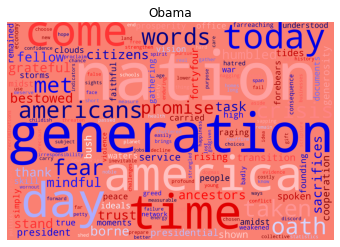

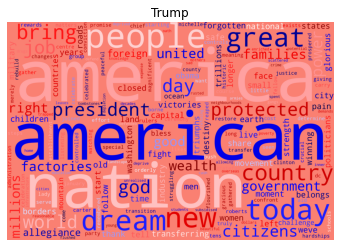

In [ ]:
wc = WordCloud(width = 3000,
               height = 2000,
               random_state = 42,
               background_color = "salmon",
               colormap = "seismic",).generate(text)

plt.imshow(wc)
plt.axis('off')
plt.title('Obama')
plt.show()

wc = WordCloud(width = 3000,
               height = 2000,
               random_state = 42,
               background_color = "salmon",
               colormap = "seismic",).generate(text2)

plt.imshow(wc)
plt.axis('off')
plt.title('Trump')
plt.show()

**Document Similarity**

In [ ]:
tokens2 = text2.split()
tokens2 = [x for x in tokens2 if x not in stopwords]
print(tokens2)

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'fellow', 'americans', 'people', 'world', '–', 'thank', 'citizens', 'america', 'joined', 'great', 'national', 'effort', 'rebuild', 'county', 'restore', 'promise', 'people', 'determine', 'course', 'america', 'years', 'come', 'face', 'challenges', 'confront', 'hardships', 'job', 'years', 'gather', 'steps', 'carry', 'orderly', 'peaceful', 'transfer', 'power', 'grateful', 'president', 'obama', 'lady', 'michelle', 'obama', 'gracious', 'aid', 'transition', 'magnificent', 'thank', 'todays', 'ceremony', 'special', 'meaning', 'today', 'merely', 'transferring', 'power', 'administration', '–', 'transferring', 'washington', 'dc', 'giving', 'people', 'long', 'small', 'group', 'nations', 'capital', 'reaped', 'rewards', 'government', 'people', 'borne', 'cost', 'washington', 'flourished', 'people', 'share', 'wealth', 'politicians', 'prospered', 'jobs', 'left', 'factories', 'closed', 'establishment', 'pr

In [ ]:
v1 =[]
v2 =[]

In [ ]:
vector = np.concatenate((tokens, tokens2))
print(vector)

['fellow' 'citizens' 'stand' 'today' 'humbled' 'task' 'grateful' 'trust'
 'bestowed' 'mindful' 'sacrifices' 'borne' 'ancestors' 'thank' 'president'
 'bush' 'service' 'nation' 'generosity' 'cooperation' 'shown' 'transition'
 'fortyfour' 'americans' 'taken' 'presidential' 'oath' 'words' 'spoken'
 'rising' 'tides' 'prosperity' 'waters' 'peace' 'oath' 'taken' 'amidst'
 'gathering' 'clouds' 'raging' 'storms' 'moments' 'america' 'carried'
 'simply' 'skill' 'vision' 'high' 'office' 'people' 'remained' 'faithful'
 'ideals' 'forebears' 'true' 'founding' 'documents' 'generation'
 'americans' 'midst' 'crisis' 'understood' 'nation' 'war' 'farreaching'
 'network' 'violence' 'hatred' 'economy' 'badly' 'weakened' 'consequence'
 'greed' 'irresponsibility' 'collective' 'failure' 'hard' 'choices'
 'prepare' 'nation' 'new' 'age' 'homes' 'lost' 'jobs' 'shed' 'businesses'
 'shuttered' 'health' 'care' 'costly' 'schools' 'fail' 'day' 'brings'
 'evidence' 'ways' 'use' 'energy' 'strengthen' 'adversaries' 'thre

In [ ]:
for w in vector:
  if w in tokens: v1.append(1) # create a numerical vector
  else: v1.append(0)
  
  if w in tokens2: v2.append(1)
  else: v2.append(0)

In [ ]:
print(len(v1))
print(len(v2))

747
747


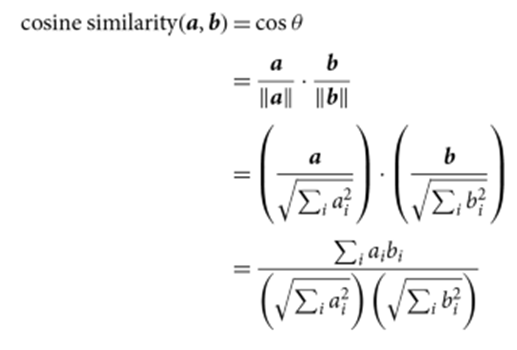

In [ ]:
c = 0

for i in range(len(vector)):
  c += v1[i] * v2[i]

cosine = c / float((sum(v1) * sum(v2)) ** 0.5)
print(f'Similarity: {cosine}')

Similarity: 0.37998029782867415


#Document-term matrix -- working with dataframe

**Upload data and apply preprocessing function**

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/NLP/2nd November/news_lite.csv" # define path for data file

In [ ]:
news_lite = pd.read_csv(path, usecols = ['article'])
news_lite['article'] = news_lite['article'].astype('str')

In [ ]:
news_lite.article.head()

0    CAPE TOWN (Reuters) - South African FIFA presi...
1    TOKYO, May 21 (Reuters) - Japanese government ...
2    MOSCOW (Reuters) - A total of 48,000 of Russia...
3    Georgetown University, J.D.\nGeorgetown Univer...
4    Aug 16 (Reuters) - Tecan Group AG: * TECAN ACC...
Name: article, dtype: object

In [ ]:
# Apply all pre-processing functions
def normalize_text(doc):
  
  no_url     = re.sub(r'^https?:\/\/.*[\r\n]*', '', doc, flags=re.MULTILINE)  # remove URLs
  no_retweet = re.sub('RT', "", no_url)                                       # remove retweet characters
  lower      = no_retweet.lower()                                             # all lower case
  ext_format = cont_to_exp(lower)                                             # convert words to extended format
  no_tags    = BeautifulSoup(ext_format, 'lxml').get_text()                   # remove HTML tags
  nopunc     = no_tags.translate(remove_punct)                                # remove punctuation
  words      = nopunc.split()                                                 # split into tokens
  nostop     = [w for w in words if w not in stopwords]                       # remove stopwords
  no_numbers = [w if not w.isdigit() else '' for w in nostop]                 # normalize numbers
  stem_text  = [stemmer.stem(w) for w in no_numbers]                          # stem each word
  
  return ' '.join(stem_text)

In [ ]:
news_lite['preproc'] = news_lite.article.progress_apply(lambda row: normalize_text(row)) # apply preprocessing function to article column

100%|██████████| 633/633 [00:05<00:00, 125.88it/s]


In [ ]:
news_lite.preproc.head()

0    cape town reuter south african fifa presidenti...
1    tokyo  reuter japanes govern bond price flat t...
2    moscow reuter total  russian troop taken mosco...
3    georgetown univers jd georgetown univers ba ad...
4    aug  reuter tecan group ag tecan acceler broad...
Name: preproc, dtype: object

**Explore the text with some basic statistics**

In [ ]:
def avg_word_len(x):
  words = x.split()
  word_len = 0
  for word in words:
    word_len = word_len + len(word)
  return word_len/len(words)

In [ ]:
news_lite['avg_word_len'] = news_lite['article'].apply(lambda x: avg_word_len(x))

In [ ]:
news_lite.head()

,article,preproc,avg_word_len
0,CAPE TOWN (Reuters) - South African FIFA presi...,cape town reuter south african fifa presidenti...,5.364286
1,"TOKYO, May 21 (Reuters) - Japanese government ...",tokyo reuter japanes govern bond price flat t...,5.130769
2,"MOSCOW (Reuters) - A total of 48,000 of Russia...",moscow reuter total russian troop taken mosco...,5.290323
3,"Georgetown University, J.D.\nGeorgetown Univer...",georgetown univers jd georgetown univers ba ad...,4.914894
4,Aug 16 (Reuters) - Tecan Group AG: * TECAN ACC...,aug reuter tecan group ag tecan acceler broad...,5.750000


In [ ]:
x = ''.join(news_lite['preproc'])
split = x.split()

In [ ]:
freqs_news = Counter(split)
freqs_news.most_common()[:20]

[('said', 1962),
 ('trump', 842),
 ('year', 812),
 ('new', 745),
 ('state', 666),
 ('report', 666),
 ('like', 631),
 ('compani', 611),
 ('presid', 603),
 ('peopl', 588),
 ('time', 553),
 ('percent', 533),
 ('china', 446),
 ('countri', 429),
 ('market', 418),
 ('work', 400),
 ('unit', 389),
 ('million', 387),
 ('want', 384),
 ('need', 376)]

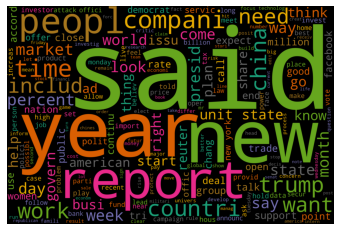

In [ ]:
wc = WordCloud(width = 3000,
               height = 2000,
               random_state = 42,
               background_color = "black",
               colormap = "Dark2",).generate(x)
   
plt.imshow(wc)
plt.axis('off')
plt.show()

**Document feature matrix representation**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features = 20, 
                      ngram_range = (1, 3))

X = vec.fit_transform(news_lite['preproc']).todense()
words = vec.get_feature_names()
x_df = pd.DataFrame(X)
x_df.columns = words
x_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,china,compani,countri,like,market,million,need,new,peopl,percent,presid,report,said,state,time,trump,unit,want,work,year
0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1,0,0,1
1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
629,1,0,0,0,9,0,0,2,1,16,0,2,1,1,2,0,1,0,0,2
630,0,4,0,0,1,1,1,1,0,0,0,1,3,0,0,0,0,0,0,3
631,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,2


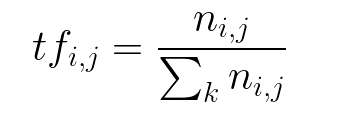

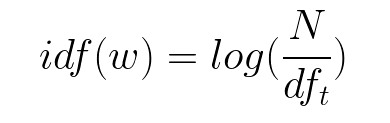

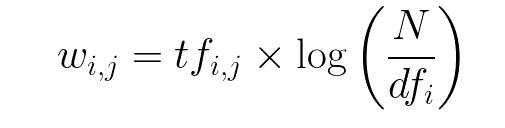

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 20,
                      ngram_range = (1,3))

X = vec.fit_transform(news_lite['preproc']).todense()
words = vec.get_feature_names()
x_df2 = pd.DataFrame(X)
x_df2.columns = words
x_df2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,china,compani,countri,like,market,million,need,new,peopl,percent,presid,report,said,state,time,trump,unit,want,work,year
0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.75738,0.000000,0.246600,0.348133,0.000000,0.0,0.403963,0.0,0.0,0.284922
1,0.000000,0.0000,0.0,0.0,0.947738,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.319049,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.749576,0.661918,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,0.000000,1.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.568352,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.413147,0.402648,0.0,0.479403,0.0,0.0,0.338131
629,0.059873,0.0000,0.0,0.0,0.466681,0.000000,0.000000,0.076825,0.046896,0.864859,0.00000,0.069824,0.030829,0.043523,0.084834,0.0,0.050503,0.0,0.0,0.071241
630,0.000000,0.6913,0.0,0.0,0.214854,0.204504,0.212012,0.159163,0.000000,0.000000,0.00000,0.144658,0.383224,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.442778
631,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.398312,0.000000,0.000000,0.00000,0.000000,0.319678,0.000000,0.439833,0.0,0.000000,0.0,0.0,0.738715


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
np = cosine_similarity(x_df)

In [ ]:
dff = pd.DataFrame(np)

dff.head()

,0,1,2,3,4,5,6,7,8,9,...,623,624,625,626,627,628,629,630,631,632
0,1.00,0.000000,0.250000,0.0,0.0,0.651608,0.409644,0.109435,0.263523,0.350667,...,0.508001,0.0,0.322749,0.000000,0.273293,0.474342,0.093429,0.339683,0.400892,0.534522
1,0.00,1.000000,0.316228,0.0,0.0,0.032969,0.246744,0.000000,0.066667,0.000000,...,0.080322,0.0,0.000000,0.130466,0.115230,0.000000,0.472719,0.214834,0.000000,0.338062
2,0.25,0.316228,1.000000,0.0,0.0,0.417029,0.370630,0.109435,0.105409,0.191273,...,0.381000,0.0,0.129099,0.000000,0.136646,0.000000,0.112115,0.452911,0.267261,0.534522
3,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00,0.000000,0.000000,0.0,1.0,0.221163,0.027587,0.000000,0.596285,0.000000,...,0.000000,0.0,0.000000,0.145865,0.000000,0.000000,0.000000,0.640513,0.000000,0.000000


In [ ]:
dff2 = dff.iloc[0:10, 0:10]

print(dff.iloc[[1]])

   0    1         2    3    4         5         6    7         8    9    ...  \
1  0.0  1.0  0.316228  0.0  0.0  0.032969  0.246744  0.0  0.066667  0.0  ...   

        623  624  625       626      627  628       629       630  631  \
1  0.080322  0.0  0.0  0.130466  0.11523  0.0  0.472719  0.214834  0.0   

        632  
1  0.338062  

[1 rows x 633 columns]


In [ ]:
cos_sim_1_2 = cosine_similarity(dff.iloc[[0]], dff.iloc[[1]])

print(cos_sim_1_2)

[[0.48192449]]


#Sentiment classifier

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber
from textblob import TextBlob
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
tb = TextBlob(str(x), analyzer = NaiveBayesAnalyzer())
tb = Blobber(analyzer = NaiveBayesAnalyzer())

In [ ]:
sent = TextBlob("This movie is awesome")

print(sent.sentiment.polarity)

1.0


In [ ]:
sent = TextBlob("This movie is awful")

print(sent.sentiment.polarity)

-1.0


In [ ]:
sent = TextBlob("This movie is fine")

print(sent.sentiment.polarity)

0.4166666666666667


In [ ]:
sentiment_scores = [round(TextBlob(article).sentiment.polarity, 3) for article in news_lite['preproc']] # create a list of sentiment scores

print(sentiment_scores)

[0.033, 0.044, 0.0, 0.0, 0.062, -0.08, 0.092, 0.15, 0.215, 0.109, 0.0, 0.0, 0.269, -0.006, 0.033, 0.082, 0.136, 0.3, 0.084, -0.006, 0.087, 0.366, 0.163, 0.0, 0.011, -0.013, 0.0, 0.246, 0.0, 0.0, 0.02, 0.097, 0.072, 0.196, 0.062, 0.025, 0.048, 0.0, 0.002, 0.049, 0.111, 0.213, 0.185, -0.077, 0.14, 0.199, -0.031, -0.017, 0.0, 0.065, 0.0, -0.019, 0.102, 0.029, 0.008, -0.03, 0.186, 0.07, -0.18, 0.0, 0.0, 0.047, 0.093, 0.0, 0.045, 0.044, -0.144, 0.137, 0.099, -0.021, 0.031, 0.086, -0.1, 0.0, 0.093, 0.0, -0.025, 0.21, 0.148, 0.161, 0.133, -0.017, 0.0, 0.183, 0.092, -0.292, 0.117, 0.136, 0.031, 0.07, 0.122, -0.232, 0.083, -0.015, 0.127, -0.0, 0.023, 0.32, 0.0, 0.037, 0.11, 0.0, 0.068, 0.0, 0.179, 0.0, -0.012, -0.011, 0.0, -0.107, 0.091, 0.081, 0.241, 0.205, -0.049, 0.098, 0.446, 0.087, 0.153, -0.001, -0.13, 0.295, 0.567, 0.157, 0.022, 0.15, -0.166, 0.108, 0.104, 0.037, 0.082, 0.077, 0.19, 0.115, 0.026, 0.139, -0.001, 0.215, 0.021, 0.0, 0.023, 0.066, 0.162, -0.007, 0.015, 0.0, 0.073, 0.0, 0.142

In [ ]:
sentiment_category = ['positive' if score > 0
                      else 'negative' if score < 0
                      else 'neutral'
                      for score in sentiment_scores] # create a list of santiment categories

In [ ]:
news_lite['sentiment_score'] = sentiment_scores # assign santiment score / category to a data frame
news_lite['sentiment'] = sentiment_category

In [ ]:
news_lite.head()

,article,preproc,avg_word_len,sentiment_score,sentiment
0,CAPE TOWN (Reuters) - South African FIFA presi...,cape town reuter south african fifa presidenti...,5.364286,0.033,positive
1,"TOKYO, May 21 (Reuters) - Japanese government ...",tokyo reuter japanes govern bond price flat t...,5.130769,0.044,positive
2,"MOSCOW (Reuters) - A total of 48,000 of Russia...",moscow reuter total russian troop taken mosco...,5.290323,0.000,neutral
3,"Georgetown University, J.D.\nGeorgetown Univer...",georgetown univers jd georgetown univers ba ad...,4.914894,0.000,neutral
4,Aug 16 (Reuters) - Tecan Group AG: * TECAN ACC...,aug reuter tecan group ag tecan acceler broad...,5.750000,0.062,positive


In [ ]:
news_lite.describe()

,avg_word_len,sentiment_score
count,633.000000,633.000000
mean,5.105378,0.066419
std,0.427995,0.125962
min,3.000000,-0.800000
25%,4.933824,0.000000
50%,5.128713,0.058000
75%,5.333333,0.132000
max,6.416667,0.567000


In [ ]:
import numpy as np

news_lite['trump'] = np.where(news_lite['preproc'].str.contains('trump'), 1, 0)          #create dummy variables switchon on with a presence of such tokens as china, rus and trump
news_lite['rus'] = np.where(news_lite['preproc'].str.contains('rus'), 1, 0)
news_lite['china'] = np.where(news_lite['preproc'].str.contains('china|chines'), 1, 0)

In [ ]:
news_lite.describe()

,avg_word_len,sentiment_score,trump,rus,china
count,633.000000,633.000000,633.000000,633.00000,633.000000
mean,5.105378,0.066419,0.246445,0.21169,0.202212
std,0.427995,0.125962,0.431282,0.40883,0.401967
min,3.000000,-0.800000,0.000000,0.00000,0.000000
25%,4.933824,0.000000,0.000000,0.00000,0.000000
50%,5.128713,0.058000,0.000000,0.00000,0.000000
75%,5.333333,0.132000,0.000000,0.00000,0.000000
max,6.416667,0.567000,1.000000,1.00000,1.000000


#Linear Regression as Exploratory Tool

In [ ]:
from sklearn.linear_model import LinearRegression # import linear regression

In [ ]:
y = np.array(news_lite['trump']) #need to represent the data as numerical array for computational routines

print(y)

[0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1
 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 

In [ ]:
x = np.array(news_lite['rus'])

print(x)

[0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 

In [ ]:
x = x.reshape((-1, 1)) # reshape vector for computational routine

print(x)

[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]


In [ ]:
m1 = LinearRegression().fit(x, y)

print(f'Slope: {m1.coef_}')

Slope: [0.14177609]


In [ ]:
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(x, prepend = False)
m2 = sm.OLS(y, x)
res = m2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     11.61
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           0.000699
Time:                        19:08:57   Log-Likelihood:                -359.57
No. Observations:                 633   AIC:                             723.1
Df Residuals:                     631   BIC:                             732.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1418      0.042      3.407      0.0

In [ ]:
x2 = np.array(news_lite['china'])
x2 = x2.reshape((-1, 1))
x3 = np.array(news_lite['avg_word_len'])
x3 = x3.reshape((-1, 1))

In [ ]:
X = np.column_stack((x,x2,x3))

print(X)

[[0.         1.         0.         5.36428571]
 [0.         1.         0.         5.13076923]
 [1.         1.         0.         5.29032258]
 ...
 [0.         1.         0.         5.11873351]
 [0.         1.         0.         5.32105263]
 [0.         1.         0.         5.03571429]]


In [ ]:
X = sm.add_constant(X, prepend = False)

In [ ]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     9.513
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           3.75e-06
Time:                        19:08:57   Log-Likelihood:                -351.29
No. Observations:                 633   AIC:                             710.6
Df Residuals:                     629   BIC:                             728.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1168      0.042      2.803      0.0

In [ ]:
news_lite['dummy_positive'] = np.where(news_lite['sentiment'].str.contains('positive'), 1, 0)

In [ ]:
news_lite.head()

,article,preproc,avg_word_len,sentiment_score,sentiment,trump,rus,china,dummy_positive
0,CAPE TOWN (Reuters) - South African FIFA presi...,cape town reuter south african fifa presidenti...,5.364286,0.033,positive,0,0,0,1
1,"TOKYO, May 21 (Reuters) - Japanese government ...",tokyo reuter japanes govern bond price flat t...,5.130769,0.044,positive,0,0,0,1
2,"MOSCOW (Reuters) - A total of 48,000 of Russia...",moscow reuter total russian troop taken mosco...,5.290323,0.000,neutral,0,1,0,0
3,"Georgetown University, J.D.\nGeorgetown Univer...",georgetown univers jd georgetown univers ba ad...,4.914894,0.000,neutral,0,0,0,0
4,Aug 16 (Reuters) - Tecan Group AG: * TECAN ACC...,aug reuter tecan group ag tecan acceler broad...,5.750000,0.062,positive,0,0,0,1


In [ ]:
x4 = y.reshape((-1, 1))

In [ ]:
X = np.column_stack((x,x2,x3,x4))

In [ ]:
X = sm.add_constant(X, prepend=False)

In [ ]:
y = np.array(news_lite['dummy_positive'])

In [ ]:
res3 = sm.OLS(y, X).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.392
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           4.80e-05
Time:                        19:08:57   Log-Likelihood:                -400.72
No. Observations:                 633   AIC:                             811.4
Df Residuals:                     628   BIC:                             833.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0864      0.045      1.904      0.0

#Exercise

*   Upload 1600000.processed.noemoticon.csv
*   Keep only sentiment and twitts columns [0,5]. Assign the names ['twitts', 'sentiment']
*   Convert sentiment variable to a binary indicator (0,1)
*   Keep 25% of the sample using sample method

*   Calculate word counts for each twitt in the document
*   Calculate average word length
*   Calculate number of #HashTags and @Mentions for each twit in the document using startwith method

*   Create dummy variables indicating the presence of #HashTags and @Mentions in the twitts column
*   Apply preprocessing function for twitts column (may take some time)

*   Calculate the top 20 most and least common words in twits column and exclude them from the twitts
*   Apply WordCloud visualization tool

*   Using linear regression estimate whether #HashTags and @Mentions dummies and average words length predict positive sentiment






**The data for the exercise can be downloaded here**
https://www.kaggle.com/datasets/ferno2/training1600000processednoemoticoncsv

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/NLP/2nd November/training.1600000.processed.noemoticon.csv"

colnames = ['sentiment', 'id', 'date', 'category', 'user', 'tweet'] 
cols = ['sentiment', 'tweet']
df = pd.read_csv(path, names = colnames, usecols = cols, encoding = 'latin-1')

df['sentiment'] = np.where(df['sentiment'] == 4, 1, df['sentiment'])

df = df.sample(frac = 0.25, random_state = 42)

df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))

df['avg_word_length'] = df['tweet'].apply(lambda x: np.mean([len(w) for w in x.split()]))

mention = '@'
df['mention_count'] = df['tweet'].str.count(mention)
df['contains_mention'] = (df['mention_count'] > 0)*1

hashtag = '#'
df['hashtag_count'] = df['tweet'].str.count(hashtag)
df['contains_hashtag'] = (df['hashtag_count'] > 0)*1

df['preprocessed'] = df.tweet.progress_apply(lambda x: normalize_text(x))

df.head()

100%|██████████| 400000/400000 [04:21<00:00, 1531.68it/s]


,sentiment,tweet,word_count,avg_word_length,mention_count,contains_mention,hashtag_count,contains_hashtag,preprocessed
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!,6,5.333333,1,1,0,0,chrishasboob ahhh hope ok
750,0,"@misstoriblack cool , i have no tweet apps fo...",12,3.750000,1,1,0,0,misstoriblack cool tweet app razr
766711,0,@TiannaChaos i know just family drama. its la...,27,4.074074,1,1,0,0,tiannachao know famili drama lamehey time hang...
285055,0,School email won't open and I have geography ...,16,4.687500,0,0,0,0,school email wont open geographi stuff revis s...
705995,0,upper airways problem,3,6.333333,0,0,0,0,upper airway problem


In [ ]:
words = ' '.join([i for i in df['preprocessed']]).split()
most_common = Counter(words).most_common()

top_20 = most_common[0:20]
bottom_20 = most_common[-20:]

top_20_words = [i[0] for i in top_20]
bottom_20_words = [i[0] for i in bottom_20]

print(top_20_words)
print(bottom_20_words)

['day', 'good', 'work', 'like', 'love', 'today', 'time', 'go', 'got', 'thank', 'want', 'miss', 'lol', 'know', 'feel', 'think', 'im', 'hope', 'night', 'watch']
['servey', 'alexjohnp', 'lisswin', 'stephencisnero', 'andf', 'dotheri', 'starzskymoon', 'feelinf', 'awawyyyy', 'amandaaa', 'aour', 'techer', 'tigerlilie18', 'thebcgirl', 'dannycyrus', '627photo', 'pinkpearl24', 'alexandrakeech', 'josiestingray', 'universalif']


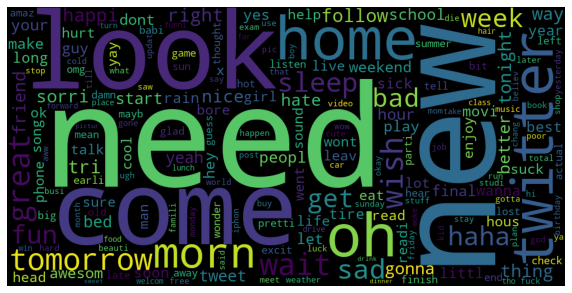

In [ ]:
words_to_remove = top_20_words + bottom_20_words

new_words = [word for word in words if word not in words_to_remove]

word_could_dict = Counter(new_words)
wordcloud = WordCloud(width = 1000,
                      height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize = (10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
y = np.array(df['contains_mention'])

x = np.array(df['contains_hashtag'])
x = x.reshape((-1, 1))

m1 = LinearRegression().fit(x, y)
print(f'Slope: {m1.coef_}')

Slope: [-0.02739363]


In [ ]:
x = sm.add_constant(x, prepend = False)
m2 = sm.OLS(y, x)
res = m2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     27.10
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.93e-07
Time:                        21:58:54   Log-Likelihood:            -2.8944e+05
No. Observations:              400000   AIC:                         5.789e+05
Df Residuals:                  399998   BIC:                         5.789e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0274      0.005     -5.206      0.0

In [ ]:
x2 = np.array(df['avg_word_length'])
x2 = x2.reshape((-1, 1))

X = np.column_stack((x, x2))
print(X)

[[0.         1.         5.33333333]
 [0.         1.         3.75      ]
 [0.         1.         4.07407407]
 ...
 [0.         1.         5.16666667]
 [0.         1.         5.        ]
 [0.         1.         3.68      ]]


In [ ]:
X = sm.add_constant(X, prepend = False)

res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     7810.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:59:41   Log-Likelihood:            -2.8179e+05
No. Observations:              400000   AIC:                         5.636e+05
Df Residuals:                  399997   BIC:                         5.636e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0697      0.005    -13.475      0.0

In [ ]:
x3 = y.reshape((-1, 1))

X = np.column_stack((x, x2, x3))

X = sm.add_constant(X, prepend = False)

y = np.array(df['sentiment'])

res3 = sm.OLS(y, X).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6464.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:12:12   Log-Likelihood:            -2.8085e+05
No. Observations:              400000   AIC:                         5.617e+05
Df Residuals:                  399996   BIC:                         5.617e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0546      0.005     10.575      0.0